### Agrupamento


#### 1) Utilize o dataset Mall_Costumers que está disponível no formato .csv, seu objetivo será criar um modelo de agrupamento para descobrir grupos de compras, para que se possa fazer um estudo de perfil de gastos. Você deve utilizar as seguintes variáveis: Age (idade), Spending Score (número entre 1 - 100 que representa o quanto uma pessoa gasta no shopping), utilize o método que preferir para definir o número de grupos. Demonstre todos os passos que criou para chegar na resposta. Apresente o modelo e suas métricas de avaliação.

#### Importando bibliotecas

In [1]:
### Análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criação do modelo
from sklearn.cluster import KMeans

### Avaliação de métricas
from sklearn.metrics import calinski_harabasz_score, silhouette_score

#### Leitura de dados

In [2]:
data = pd.read_csv("Mall_Customers.csv", sep=",")
data.head() # imprimir 5 primeiros registros

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Análise exploratória

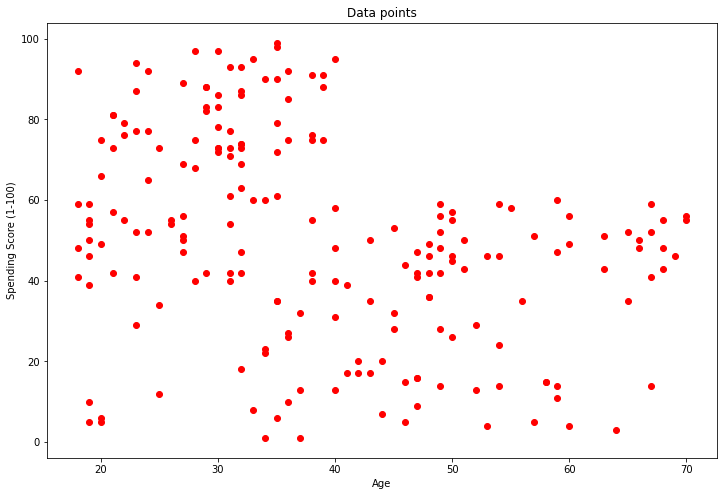

In [5]:
# Plotando pontos
plt.figure(figsize = (12,8))

plt.scatter(x = data['Age'], y = data['Spending Score (1-100)'], color = "red")
plt.title("Data points")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

#### Definição do modelo e treino

In [8]:
# Todos dados são para treino
# Transformando em array do numpy
X = np.array(data[['Age', 'Spending Score (1-100)']])

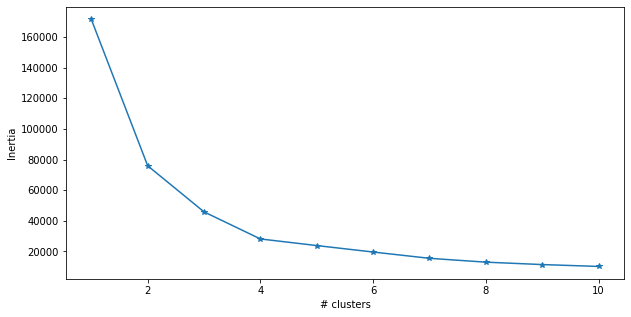

In [20]:
# Definindo um bom número de clusters
# Método do cotovelo (ELBOW METHOD)

distances = []
for i in range(1,11):
    model = KMeans(n_clusters = i)
    model.fit(X)
    distances.append(model.inertia_)

plt.figure(figsize = (10,5))
plt.plot(range(1,11), distances, marker = '*')
plt.xlabel("# clusters")
plt.ylabel("Inertia")
plt.show()

In [21]:
# instanciando modelos
model = KMeans(n_clusters = 10)

# Treinando modelo
model.fit(X)

KMeans(n_clusters=10)

#### Avaliando modelos

In [22]:
# Calinki-Harabasz e Silhouette Score

print(f'Calinski-Harabasz score: {calinski_harabasz_score(X, model.labels_)}')
print(f'Silhouette score: {silhouette_score(X, model.labels_)}')

Calinski-Harabasz score: 326.81171387402264
Silhouette score: 0.40651281999866284


In [23]:
# Printando rótulos
print(model.labels_)

[9 4 0 4 9 4 0 1 5 4 5 1 5 4 0 4 9 4 7 1 9 4 5 4 5 4 7 3 7 1 5 4 5 1 5 4 7
 4 7 4 6 1 2 3 7 4 8 9 9 9 8 3 3 8 2 2 8 6 3 2 6 3 6 8 6 3 2 6 3 9 6 2 6 6
 6 3 8 2 3 2 8 8 6 2 3 2 8 3 3 2 6 9 2 2 9 3 2 3 2 3 9 2 6 3 8 9 6 2 6 6 6
 3 2 3 3 3 6 8 2 8 3 2 8 1 9 4 2 1 5 4 5 4 9 4 0 1 5 4 0 4 5 1 9 1 0 1 2 4
 7 1 7 1 7 4 5 1 0 4 0 4 2 1 0 1 7 4 7 1 7 4 0 4 0 1 5 1 5 4 5 1 7 1 5 1 2
 1 7 4 7 1 7 4 0 1 5 4 7 4 0 1]


#### Analisando clusters

IndexError: list index out of range

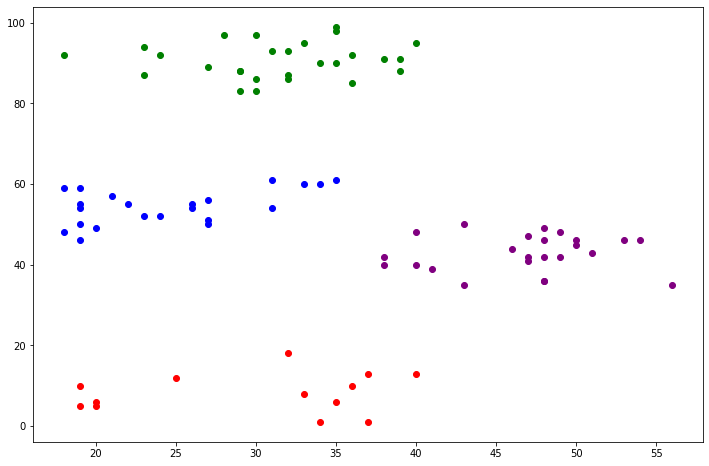

In [25]:
plt.figure(figsize = (12,8))

labels = list(set(model.labels_))
colors = ['red', 'green', 'purple', 'blue']

for i,l in enumerate(labels):
    data_cluster = data.iloc[np.where(model.labels_ == l)[0],:]
    plt.scatter(data_cluster["Age"], data_cluster["Spending Score (1-100)"], color = colors[i], label = l)
    
plt.scatter(x = model.cluster_centers_[:,0], y = model.cluster_centers_[:,1], marker = 'v', color = 'black', label = "centers")

plt.legend()
plt.title("Clusters")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()